<a href="https://colab.research.google.com/github/MohamedmuhsinJ/TEST/blob/main/02.%20Working%20with%20Text%20Data/5.%20Case%20Study%20-%20Email%20Spam%20Filtering/old_email_spam_filtering_w2v_glove_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AI BASED SOLUTION FOR FLAGGING OF FALSE
INFORMATION ON ONLINE**

In [265]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/new_newsdesk.csv")

In [266]:
data = data.dropna(how = 'any', axis = 0)

In [267]:
data.isnull().sum()

,0
label,0
text,0


In [268]:
data.label.value_counts()

,count
label,
FAKE,1871
REAL,1850


In [269]:
from nltk.stem.porter import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.stem import WordNetLemmatizer

In [270]:
from nltk.corpus import stopwords
import nltk


In [271]:
stemming = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [272]:
from sklearn.model_selection import train_test_split

In [273]:
X=data[['text']]
Y=data['label']

In [274]:
X

,text
0,Payal has accused filmmaker Anurag Kashyap of ...
1,A four-minute-long video of a woman criticisin...
2,"Republic Poll, a fake Twitter account imitatin..."
3,"Delhi teen finds place on UN green list, turns..."
4,Delhi: A high-level meeting underway at reside...
...,...
3724,19:17 (IST) Sep 20\n\nThe second round of coun...
3725,19:17 (IST) Sep 20\n\nThe second round of coun...
3726,The Bengaluru City Police’s official Twitter h...
3727,"Sep 20, 2020, 08:00AM IST\n\nSource: TOI.in\n\..."


In [275]:
p=data['text']
print(p)

0       Payal has accused filmmaker Anurag Kashyap of ...
1       A four-minute-long video of a woman criticisin...
2       Republic Poll, a fake Twitter account imitatin...
3       Delhi teen finds place on UN green list, turns...
4       Delhi: A high-level meeting underway at reside...
                              ...                        
3724    19:17 (IST) Sep 20\n\nThe second round of coun...
3725    19:17 (IST) Sep 20\n\nThe second round of coun...
3726    The Bengaluru City Police’s official Twitter h...
3727    Sep 20, 2020, 08:00AM IST\n\nSource: TOI.in\n\...
3728    Read Also\n\nRead Also\n\nAdvocate Ishkaran Bh...
Name: text, Length: 3721, dtype: object


In [276]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [277]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (2976, 1)
y_train: (2976,)
x_test: (745, 1)
y_test: (745,)


In [278]:
X_train = x_train

In [279]:
x_train.head()

,text
209,Several mainstream news outlets such as the Ti...
3374,NEW DELHI: The Drugs Controller General of Ind...
3540,A screenshot purporting to be a newspaper clip...
2472,A viral video of a woman with infant traveling...
2510,Read Also\n\nBe it winning hearts or winning t...


In [280]:
X_test = x_test

In [281]:
y_train.head()

,label
209,FAKE
3374,REAL
3540,FAKE
2472,FAKE
2510,REAL


In [282]:
X_train.head()

,text
209,Several mainstream news outlets such as the Ti...
3374,NEW DELHI: The Drugs Controller General of Ind...
3540,A screenshot purporting to be a newspaper clip...
2472,A viral video of a woman with infant traveling...
2510,Read Also\n\nBe it winning hearts or winning t...


In [283]:
X_test.head(10)

,text
908,NEW DELHI: A final decision on Pakistan's stat...
3454,NEW DELHI: Seven of the top 10 most valued dom...
1790,"Kareena Kapoor Khan, who is all set to ring in..."
1167,A photo purporting to show a television news g...
1605,A disturbing video of a woman being flogged by...
184,A graphic photo of a human skeleton found insi...
2960,Delhi: A high-level meeting underway at reside...
1067,Social media has been rife with reports of the...
2348,A disturbing CCTV footage showing a Tamil Nadu...
3417,A disturbing video of a mentally ill woman hec...


In [284]:
y_test

,label
908,REAL
3454,REAL
1790,REAL
1167,FAKE
1605,FAKE
...,...
1239,FAKE
2409,FAKE
1958,FAKE
2680,FAKE


**Data Preprocessing**

In [285]:
!pip install nltk

import nltk
nltk.download('stopwords', force=True)
nltk.download('wordnet', force=True)
nltk.download('omw-1.4', force=True)

def preprocess(pro):
    # if not isinstance(pro, str):  # Ensure input is a string
    #  return "", 0  # Return empty text and word count 0 if input is invalid
    process = re.sub('[^a-zA-Z]'," ",pro)
    lowe = process.lower()
    tokens = lowe.split()
    stop = [lemmatizer.lemmatize(i) for i in tokens if i not in stopwords.words('english')]
    lemmas =pd.Series([ " ".join(stop),len(stop)])
    return lemmas
  # stop_words = set(stopwords.words('english'))  # Convert to set for faster lookup
  # filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Return cleaned text and word count as a tuple
  # return " ".join(filtered_tokens), len(filtered_tokens)
# def preprocess(pro):
#     process = re.sub('[^a-zA-Z]'," ",pro)
#     lowe = process.lower()
#     tokens = lowe.split()
#     stop = [lemmatizer.lemmatize(i) for i in tokens if i not in stopwords.words('English')]
#     lemmas =pd.Series([ " ".join(stop),len(stop)])
#     return lemmas

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [264]:
px_train = X_train['text'].apply(preprocess)
# px_train = X_train['text'].apply(lambda x: preprocess(x))


In [286]:
px_train.head()

,0,1
209,several mainstream news outlet time india hind...,396
3374,new delhi drug controller general india approv...,257
3540,screenshot purporting newspaper clipping claim...,289
2472,viral video woman infant traveling precariousl...,355
2510,read also winning heart winning trophy easy bi...,123


In [287]:
type(px_train)

pandas.core.frame.DataFrame

**Test data preprocessing**

In [288]:
px_test = X_test['text'].apply(preprocess)

In [289]:
px_test.head()

,0,1
908,new delhi final decision pakistan status finan...,150
3454,new delhi seven top valued domestic company sa...,187
1790,kareena kapoor khan set ring birthday tomorrow...,105
1167,photo purporting show television news graphic ...,170
1605,disturbing video woman flogged law husband all...,180


In [290]:
px_test.columns = ['clean_text','text_length']
px_test.head()

,clean_text,text_length
908,new delhi final decision pakistan status finan...,150
3454,new delhi seven top valued domestic company sa...,187
1790,kareena kapoor khan set ring birthday tomorrow...,105
1167,photo purporting show television news graphic ...,170
1605,disturbing video woman flogged law husband all...,180


In [291]:
px_train.columns = ['clean_text','text_length']
px_train.head()

,clean_text,text_length
209,several mainstream news outlet time india hind...,396
3374,new delhi drug controller general india approv...,257
3540,screenshot purporting newspaper clipping claim...,289
2472,viral video woman infant traveling precariousl...,355
2510,read also winning heart winning trophy easy bi...,123


In [292]:
X_train = pd.concat([X_train,px_train],axis=1)
X_train.head()

,text,clean_text,text_length
209,Several mainstream news outlets such as the Ti...,several mainstream news outlet time india hind...,396
3374,NEW DELHI: The Drugs Controller General of Ind...,new delhi drug controller general india approv...,257
3540,A screenshot purporting to be a newspaper clip...,screenshot purporting newspaper clipping claim...,289
2472,A viral video of a woman with infant traveling...,viral video woman infant traveling precariousl...,355
2510,Read Also\n\nBe it winning hearts or winning t...,read also winning heart winning trophy easy bi...,123


In [293]:
X_test = pd.concat([X_test,px_test],axis=1)

In [294]:
X_test.head()

,text,clean_text,text_length
908,NEW DELHI: A final decision on Pakistan's stat...,new delhi final decision pakistan status finan...,150
3454,NEW DELHI: Seven of the top 10 most valued dom...,new delhi seven top valued domestic company sa...,187
1790,"Kareena Kapoor Khan, who is all set to ring in...",kareena kapoor khan set ring birthday tomorrow...,105
1167,A photo purporting to show a television news g...,photo purporting show television news graphic ...,170
1605,A disturbing video of a woman being flogged by...,disturbing video woman flogged law husband all...,180


In [295]:
from wordcloud import WordCloud

In [296]:
y_train

,label
209,FAKE
3374,REAL
3540,FAKE
2472,FAKE
2510,REAL
...,...
1133,REAL
1297,REAL
863,FAKE
3515,REAL


In [297]:
y_test

,label
908,REAL
3454,REAL
1790,REAL
1167,FAKE
1605,FAKE
...,...
1239,FAKE
2409,FAKE
1958,FAKE
2680,FAKE


In [298]:
real_n = X_train.loc[y_train=='REAL', :]
real_n.head()

,text,clean_text,text_length
3374,NEW DELHI: The Drugs Controller General of Ind...,new delhi drug controller general india approv...,257
2510,Read Also\n\nBe it winning hearts or winning t...,read also winning heart winning trophy easy bi...,123
599,WASHINGTON: Enter Journey's Crossing Church in...,washington enter journey crossing church washi...,215
1707,NEW DELHI: The finance ministry on Saturday in...,new delhi finance ministry saturday informed l...,266
3676,PANAJI: The second phase of reviving the cocon...,panaji second phase reviving coconut tree line...,98


In [299]:
words = ' '.join(real_n['clean_text'])
clean_word = " ".join([word for word in words.split()])

In [300]:
real_word = WordCloud(stopwords=stopwords.words("english"),
  background_color='black',
  width=1600,
  height=800).generate(clean_word)

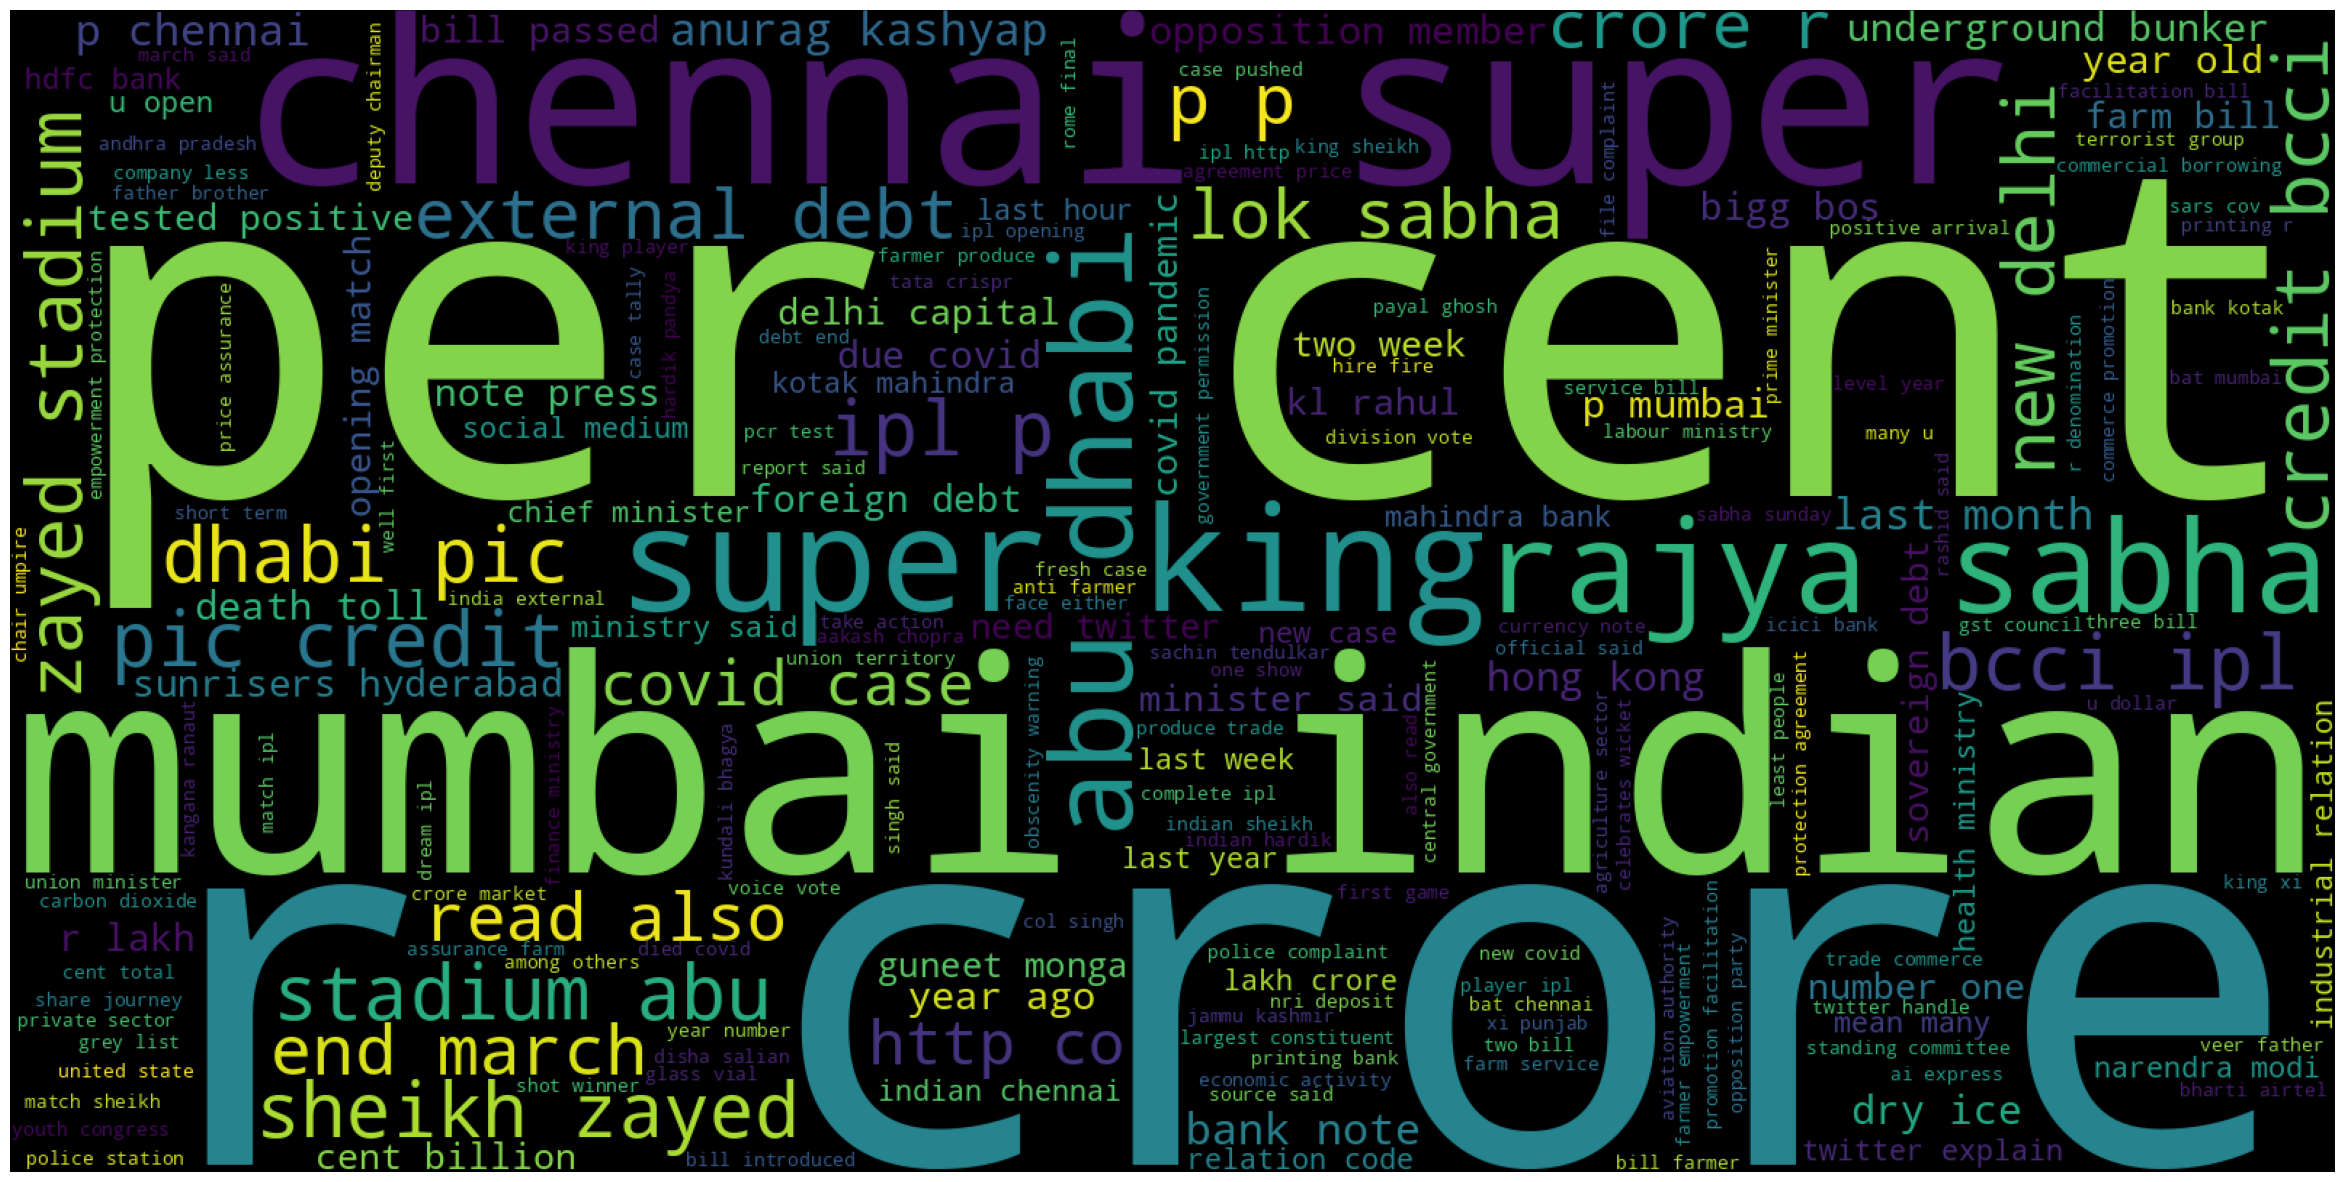

In [302]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(1,figsize=(30,20))
plt.imshow(real_word)
plt.axis('off')
plt.show()

In [303]:
fake_n = X_train.loc[y_train=='FAKE', :]
fake_n.head()

,text,clean_text,text_length
209,Several mainstream news outlets such as the Ti...,several mainstream news outlet time india hind...,396
3540,A screenshot purporting to be a newspaper clip...,screenshot purporting newspaper clipping claim...,289
2472,A viral video of a woman with infant traveling...,viral video woman infant traveling precariousl...,355
2704,A press release detailing restrictions imposed...,press release detailing restriction imposed mo...,233
1224,A video of a customer losing his cool at a bak...,video customer losing cool bakery manager kara...,238


In [304]:
words_f = ' '.join(fake_n['clean_text'])
clean_word_f = " ".join([word for word in words_f.split()])

In [305]:
real_word_f = WordCloud(stopwords=stopwords.words("english"),
background_color='black',
width=1600,
height=800).generate(clean_word_f)

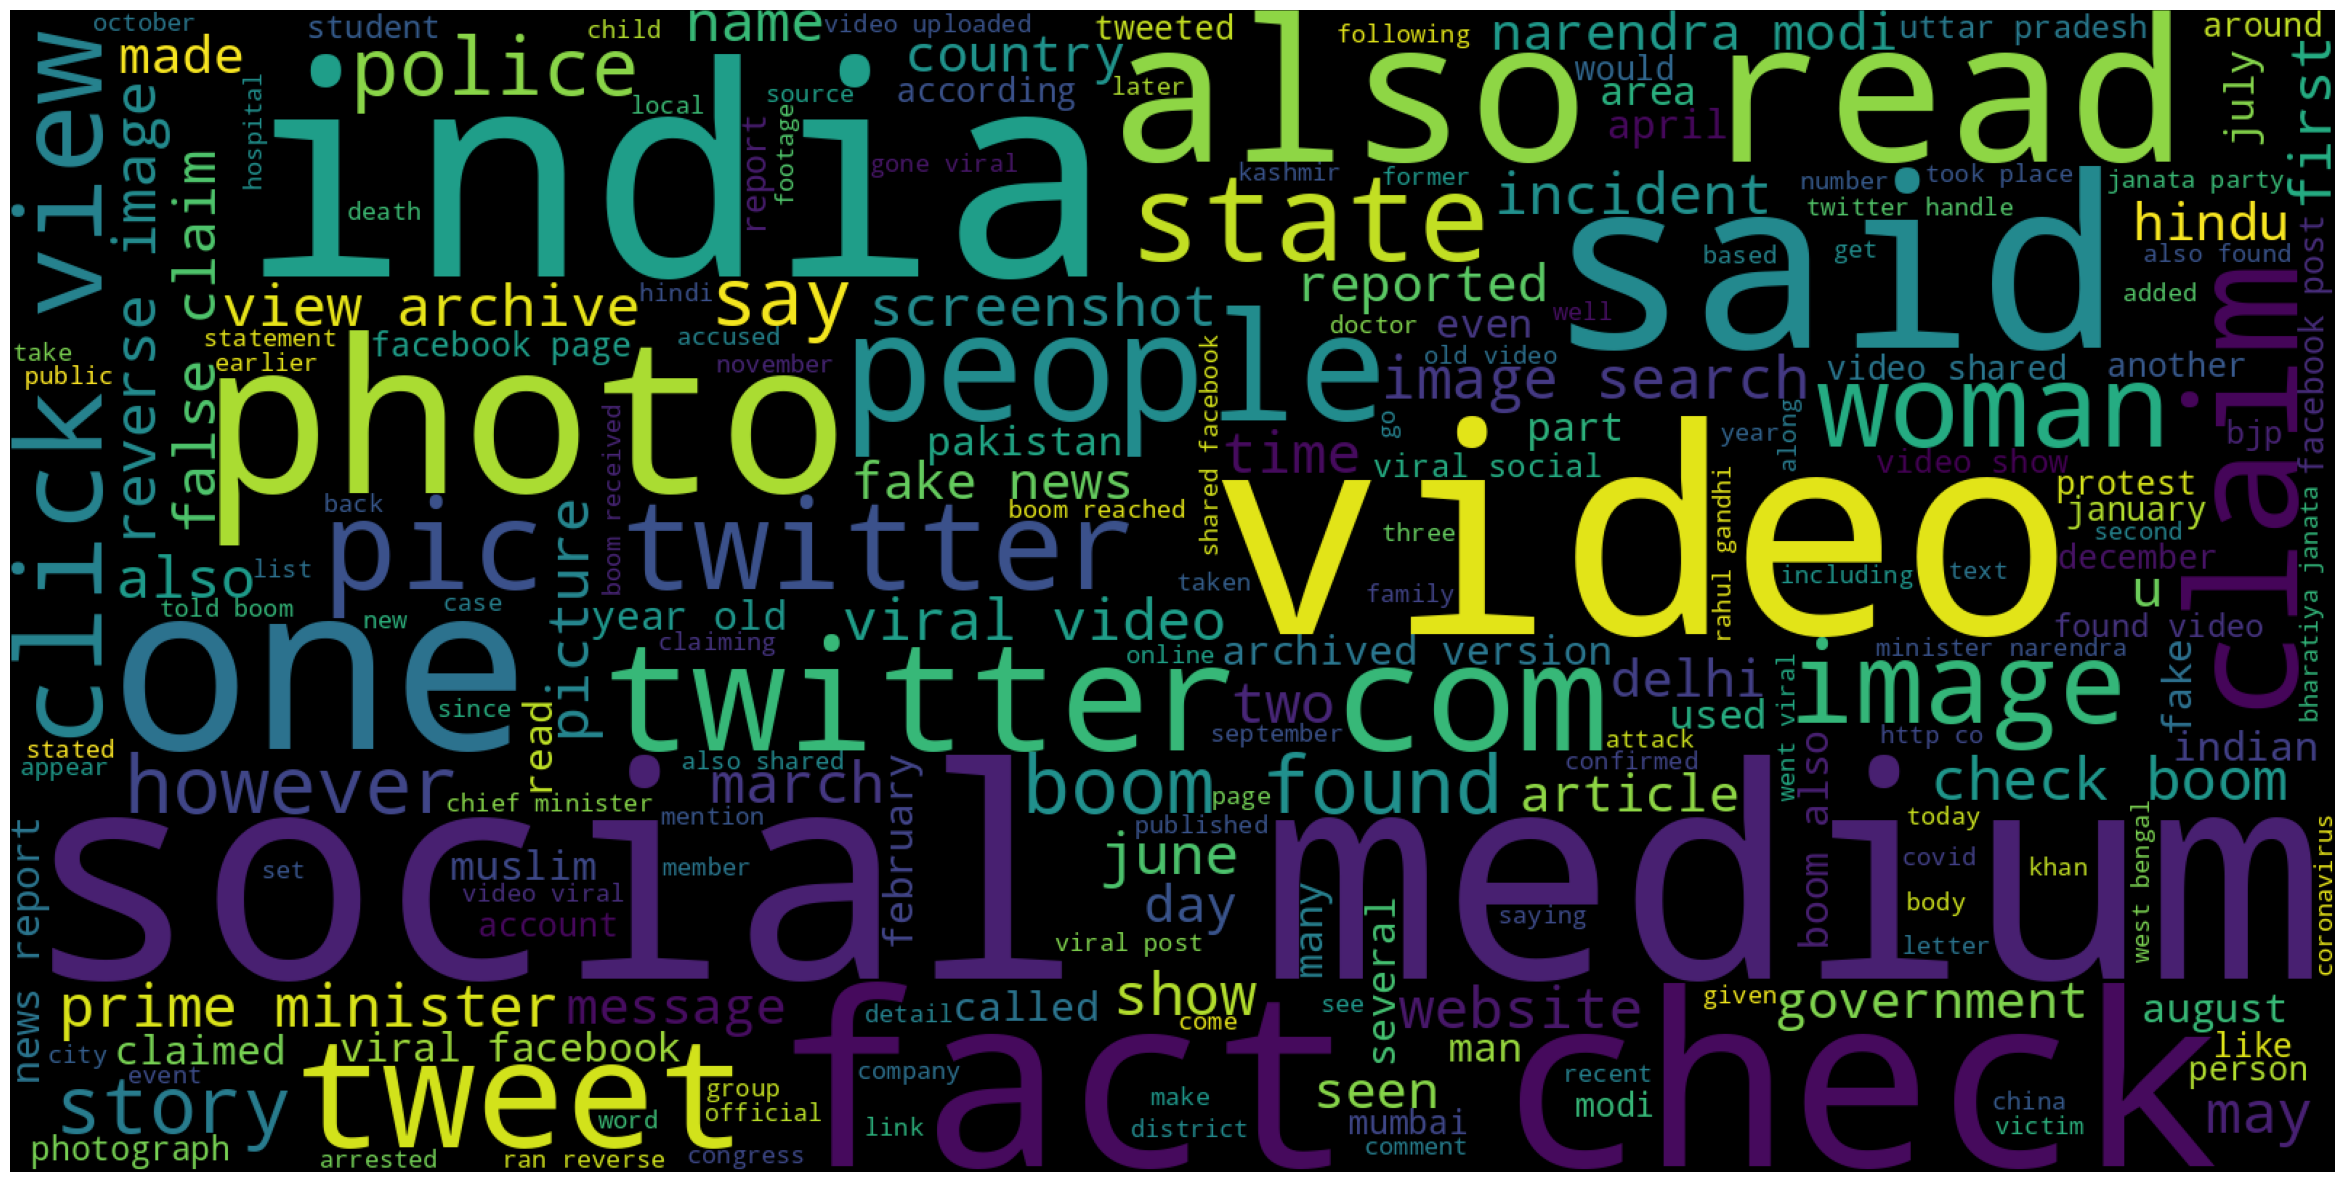

In [306]:
plt.figure(1,figsize=(30,20))
plt.imshow(real_word_f)
plt.axis('off')
plt.show()

**Tfidf Vectorizer**

In [307]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [308]:
tf_vector = TfidfVectorizer()

In [309]:
X_train_t = tf_vector.fit_transform(X_train['clean_text'])

In [310]:
(X_train_t)

<2976x28328 sparse matrix of type '<class 'numpy.float64'>'
	with 442314 stored elements in Compressed Sparse Row format>

In [311]:
print('unique words:',len(tf_vector.vocabulary_))
print('Shape of input data:',X_train_t.shape)

unique words: 28328
Shape of input data: (2976, 28328)


**Test data**

In [312]:
X_test_tf = tf_vector.transform(X_test['clean_text'])

In [313]:
X_test_tf

<745x28328 sparse matrix of type '<class 'numpy.float64'>'
	with 107322 stored elements in Compressed Sparse Row format>

**Label Encoding**

In [315]:
label = LabelEncoder()

In [316]:
y_train = label.fit_transform(y_train)

In [317]:
y_train

array([0, 1, 0, ..., 0, 1, 0])

In [318]:
Y_test = label.transform(y_test)

In [319]:
Y_test

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,

**Logistic Regression Model**

In [320]:
from sklearn.linear_model import LogisticRegression

In [321]:
models = LogisticRegression()

In [322]:
models.fit(X_train_t,y_train)

LogisticRegression()

In [323]:
from sklearn.metrics import accuracy_score

In [324]:
l_train_score = models.predict(X_train_t)
l_train_accuracy = accuracy_score(l_train_score,y_train)

In [325]:
print('train_accuracy:',l_train_accuracy)

train_accuracy: 0.998991935483871


In [326]:
l_test_score = models.predict(X_test_tf)

In [330]:
l_test_accuracy = accuracy_score(l_test_score,Y_test)

In [331]:
print('test_acccuracy:',l_test_accuracy)

test_acccuracy: 0.9919463087248322


In [335]:
from sklearn.metrics import confusion_matrix, classification_report

cmx_1=confusion_matrix(Y_test,l_test_score)
print("\nNo. of test samples : ",len(X_test))
print("\n Confustion Matrix : \n",cmx_2)
print("\nPerfomance measures are: \n",classification_report(Y_test, l_test_score))


No. of test samples :  745


NameError: name 'cmx_2' is not defined

In [336]:
news=X_train_t[1]

In [339]:
prediction = models.predict(news)
print(prediction)
if (prediction[0]==0):
    print('The news is fake') # Indented 4 spaces
else:
    print('The news is real') # Indented 4 spaces

[1]
The news is real


In [340]:
from sklearn import metrics

In [342]:
confusion = metrics.confusion_matrix(Y_test, l_test_score)

In [343]:
confusion

array([[360,   1],
       [  5, 379]])

**SVM**

In [348]:
from sklearn.svm import SVC
from sklearn import svm


In [350]:
support = svm.SVC()

In [351]:
support

SVC()

In [352]:
support.fit(X_train_t,y_train)

SVC()

In [353]:
train_score_1 = support.predict(X_train_t)
train_accuracy_1 = accuracy_score(train_score_1,y_train)

In [354]:
print('train_accuracy:',train_accuracy_1)

train_accuracy: 1.0


In [355]:
test_score_1 = support.predict(X_test_tf)

In [356]:
test_accuracy_1 = accuracy_score(test_score_1,Y_test)

In [357]:
print('test_acccuracy:',test_accuracy_1)

test_acccuracy: 0.9892617449664429


In [358]:
news_1=X_train_t[1]

In [361]:
prediction_1 = support.predict(news_1)
print(prediction_1)
if (prediction_1[0]==0):
  print('The news is fake')
else:
  print('The news is real')

[1]
The news is real


In [362]:
from sklearn.metrics import classification_report, confusion_matrix

In [363]:
confusion = metrics.confusion_matrix(Y_test, test_score_1)

In [366]:
cmx=confusion_matrix(Y_test,l_test_score)
print("\nNo. of test samples : ",len(X_test))
print("\n Confustion Matrix : \n",cmx)
print("\nPerfomance measures are: \n",classification_report(Y_test, l_test_score))


No. of test samples :  745

 Confustion Matrix : 
 [[360   1]
 [  5 379]]

Perfomance measures are: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       361
           1       1.00      0.99      0.99       384

    accuracy                           0.99       745
   macro avg       0.99      0.99      0.99       745
weighted avg       0.99      0.99      0.99       745



**KNN**

In [368]:
from sklearn.neighbors import KNeighborsClassifier

In [369]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [370]:
knn_model.fit(X_train_t,y_train)

KNeighborsClassifier()

In [371]:
knn_1_train_score = knn_model.predict(X_train_t)
knn_train_accuracy = accuracy_score(knn_1_train_score,y_train)

In [372]:
print('train_accuracy:',knn_train_accuracy)

train_accuracy: 0.9684139784946236


In [373]:
knn_test_score = knn_model.predict(X_test_tf)

In [374]:
knn_test_accuracy = accuracy_score(knn_test_score,Y_test)

In [375]:
print('test_acccuracy:',knn_test_accuracy)

test_acccuracy: 0.9409395973154362


In [376]:
cmx_2=confusion_matrix(Y_test,knn_test_score)
print("\nNo. of test samples : ",len(X_test))
print("\n Confustion Matrix : \n",cmx_2)
print("\nPerfomance measures are: \n",classification_report(Y_test, knn_test_score))


No. of test samples :  745

 Confustion Matrix : 
 [[352   9]
 [ 35 349]]

Perfomance measures are: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       361
           1       0.97      0.91      0.94       384

    accuracy                           0.94       745
   macro avg       0.94      0.94      0.94       745
weighted avg       0.94      0.94      0.94       745

